# Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

### Import libraries

Let's first import all the necessary libraries. I'll use `numpy` and `pandas` to start with. For visualization, I will use `pyplot` subpackage of `matplotlib`, use `rcParams` to add styling to the plots and `rainbow` for colors. For implementing Machine Learning models and processing of data, I will use the `sklearn` library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the `train_test_split` method. To scale the features, I am using `StandardScaler`.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Next, I'll import all the Machine Learning algorithms I will be using.
1. K Neighbors Classifier
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Import dataset

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. I'll use the pandas `read_csv` method to read the dataset.

In [4]:
datasets = pd.read_csv('dataset.csv')


The dataset is now loaded into the variable `dataset`. I'll just take a glimpse of the data using the `desribe()` and `info()` methods before I actually start processing and visualizing it.

In [5]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of `13 features` along with one target value which we wish to find.

In [6]:
datasets.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for `age` reaches 77, the maximum of `chol` (serum cholestoral) is 564.

### Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

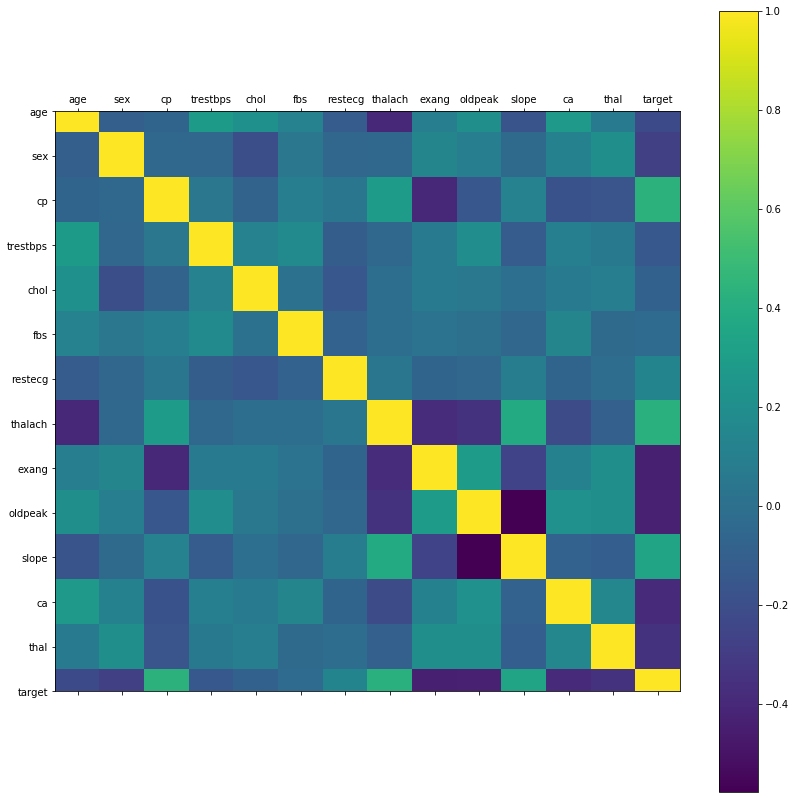

In [7]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(datasets.corr())
plt.yticks(np.arange(datasets.shape[1]), datasets.columns)
plt.xticks(np.arange(datasets.shape[1]), datasets.columns)
plt.colorbar()

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive.
Next, I'll take a look at the histograms for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0EBA50D0>,
      dtype=object)

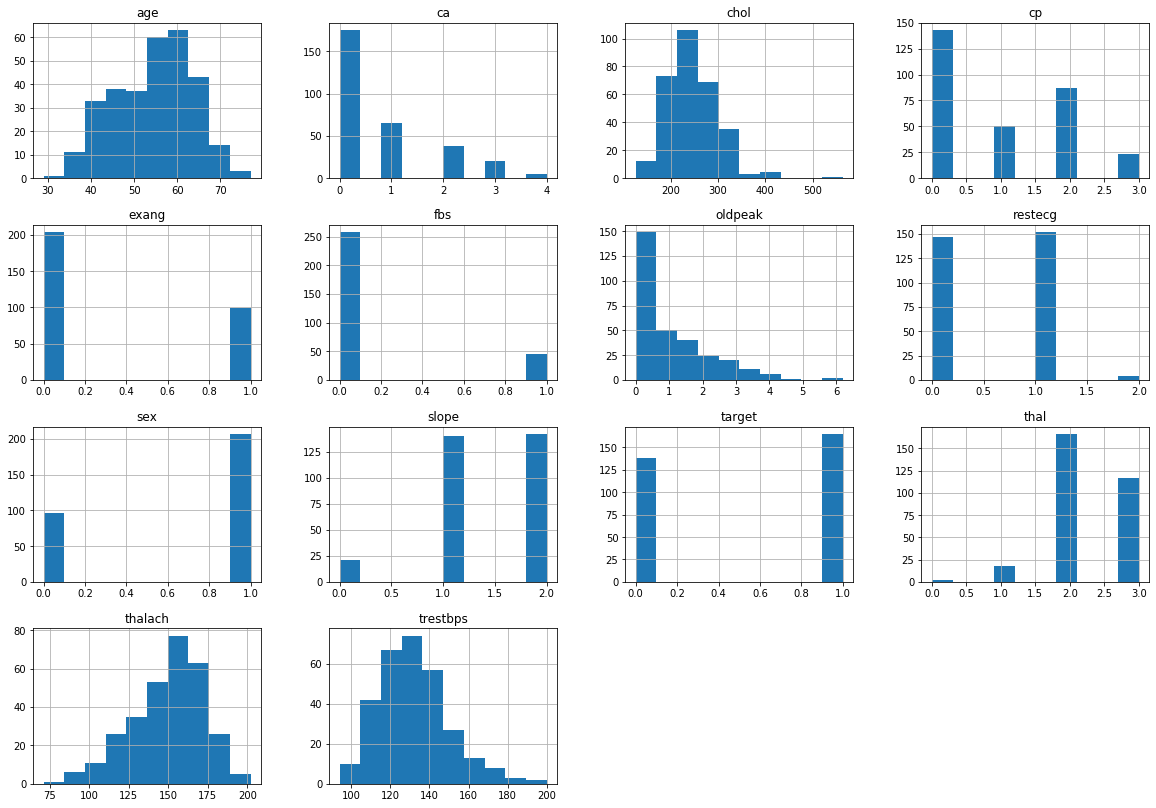

In [8]:
datasets.hist()

Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

Text(0.5, 1.0, 'Count of each Target Class')

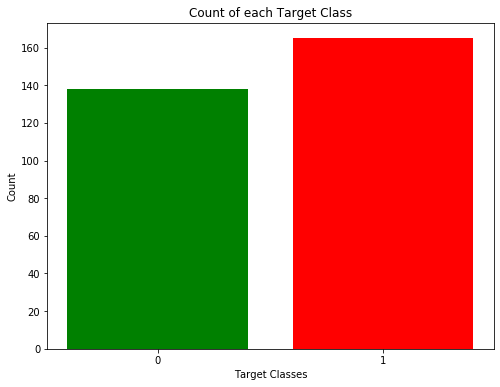

In [9]:
rcParams['figure.figsize'] = 8,6
plt.bar(datasets['target'].unique(), datasets['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

### Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [10]:
datasets = pd.get_dummies(datasets, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Now, I will use the `StandardScaler` from `sklearn` to scale my dataset.

In [11]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
datasets[columns_to_scale] = standardScaler.fit_transform(datasets[columns_to_scale])

The data is not ready for our Machine Learning application.

### Machine Learning

I'll now import `train_test_split` to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [12]:
b = datasets['target']
A = datasets.drop(['target'], axis = 1)
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.33, random_state = 0)

#### K Neighbors Classifier

The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [13]:
knn_scores = []
for k in range(1,15):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(A_train, b_train)
    knn_scores.append(knn_classifier.score(A_test, b_test))

I have the scores for different neighbor values in the array `knn_scores`. I'll now plot it and see for which value of K did I get the best scores.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

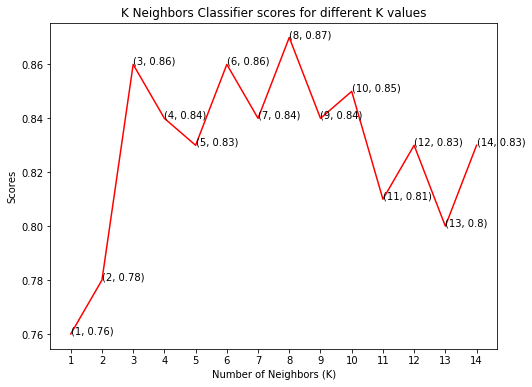

In [14]:
plt.plot([k for k in range(1, 15)], knn_scores, color = 'red')
for i in range(1,15):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was `0.87` for the 8 neighbors.

In [15]:
print("The accuracy of KNN Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The accuracy of KNN Classifier is 87.0% with 8 nieghbors.


#### Support Vector Classifier

There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score.

In [16]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(A_train, b_train)
    svc_scores.append(svc_classifier.score(A_test, b_test))

I'll now plot a bar plot of scores for each kernel and see which performed the best.

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

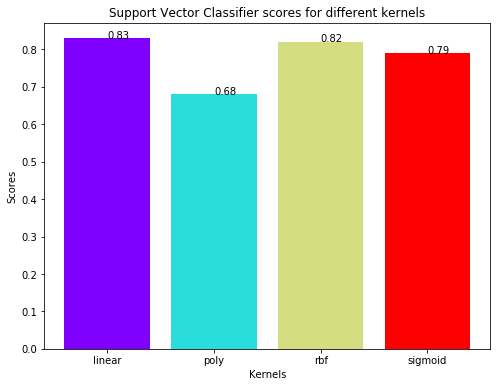

In [17]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The `linear` kernel performed the best, being slightly better than `rbf` kernel.

In [18]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 83.0% with linear kernel.


#### Decision Tree Classifier

Here, I'll use the Decision Tree Classifier to model the problem at hand. I'll vary between a set of `max_features` and see which returns the best accuracy.

In [20]:
dt_scores = []
for i in range(1, len(A.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(A_train, b_train)
    dt_scores.append(dt_classifier.score(A_test, b_test))

I selected the maximum number of features from 1 to 30 for split. Now, let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

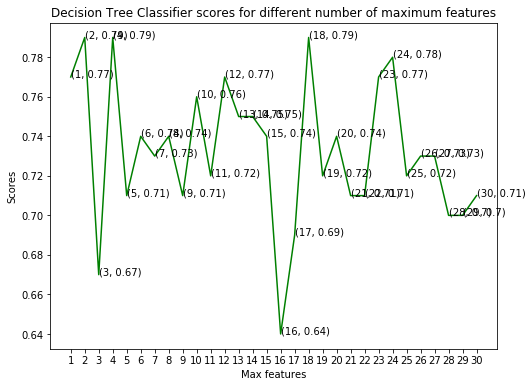

In [23]:
plt.plot([i for i in range(1, len(A.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(A.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(A.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at three values of maximum features, `2`, `4` and `18`.

In [24]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.


#### Random Forest Classifier

Now, I'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.

In [25]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(A_train, b_train)
    rf_scores.append(rf_classifier.score(A_test, b_test))

The model is trained and the scores are recorded. Let's plot a bar plot to compare the scores.

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

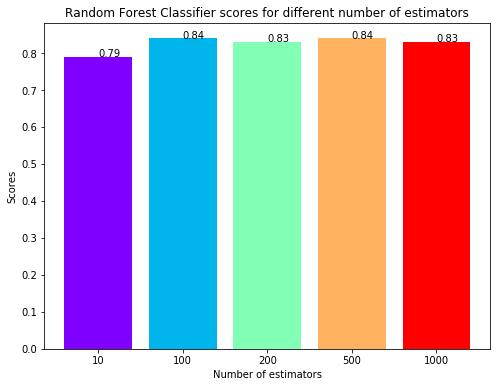

In [26]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximum score is achieved when the total estimators are 100 or 500.

In [27]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 84.0% with [100, 500] estimators.


Text(0.5, 1.0, 'Naive Bayes Classifier scores for different classifiers')

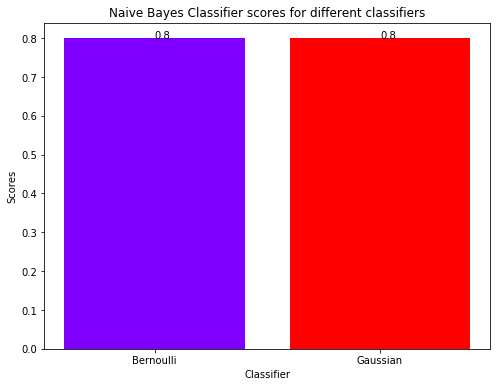

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

bern = BernoulliNB()
y_pred = bern.fit(A_train, b_train).predict(A_test)
bernscore=bern.score(A_test, b_test)

gnb = GaussianNB()
y_pred = gnb.fit(A_train, b_train).predict(A_test)
gnbscore=gnb.score(A_test, b_test)


classifier=['Bernoulli','Gaussian']
accuracy_score=[bernscore,gnbscore]


colors = rainbow(np.linspace(0, 1, len(classifier)))
plt.bar(classifier, accuracy_score, color = colors)
for i in range(len(classifier)):
    plt.text(i, accuracy_score[i], accuracy_score[i])
plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Naive Bayes Classifier scores for different classifiers')

In [30]:
print("Both Naive Bayes classifier Bernoulli and Gaussian have the same accuracy of 0.8 for this dataset so we can choose any classifier from this.")

Both Naive Bayes classifier Bernoulli and Gaussian have the same accuracy of 0.8 for this dataset so we can choose any classifier from this.


Feature Selection technique


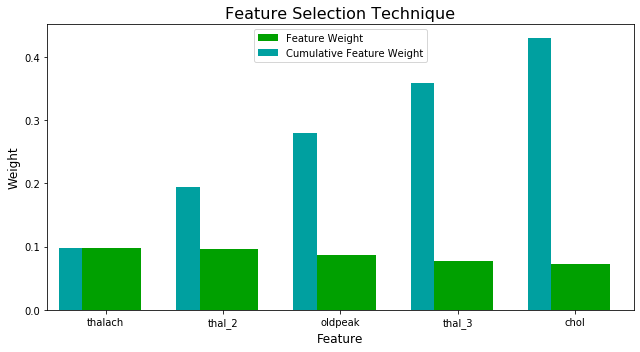

In [31]:
print("Feature Selection technique")
import matplotlib.pyplot as pl
def feature_plot(importances, A_train, b_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = A_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Feature Selection Technique", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  


model = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(A_train, b_train)


importances = model.feature_importances_


feature_plot(importances, A_train, b_train)

In [32]:
print("There are some most important feature in the heart dataset are: chol, thal_3, oldpeak, thal_2, thalach")

There are some most important feature in the heart dataset are: chol, thal_3, oldpeak, thal_2, thalach


KNN: 0.870000 
Random Forest: 0.840000 
Decision Tress: 0.790000 
Naive Bayes: 0.800000 
SVM: 0.830000 


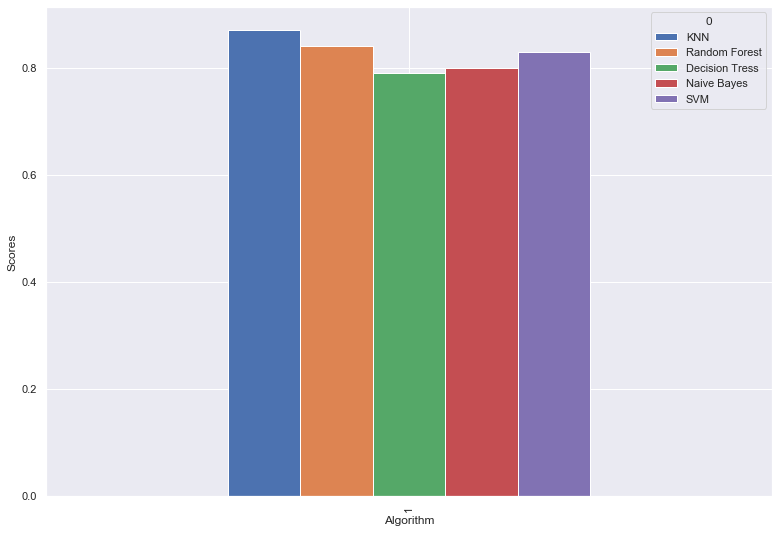

In [33]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 8)))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 100, random_state = 0)))
models.append(('Decision Tress', DecisionTreeClassifier(max_features = 2, random_state = 0)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(kernel = 'linear')))
# evaluate each model in turn
results =[]
names = []


for name, model in models:
  model.fit(A_train,b_train)
  cv_results = model.score(A_test,b_test)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f " % (name, cv_results.mean())
  print(msg)




df= pd.DataFrame([names,results])

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig = df.iloc[0:,].plot(kind='bar',figsize=(13,9))

plt.ylabel('Scores')
plt.xlabel('Algorithm')


plt.show()



In [34]:
print("The bar plot shows that the best machine learning algorithm is KNN with 0.87 accuracy")

The bar plot shows that the best machine learning algorithm is KNN with 0.87 accuracy


### Conclusion

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled other features. 
I then applied four Machine Learning algorithms, `K Neighbors Classifier`, `Support Vector Classifier`, `Decision Tree Classifier` and `Random Forest Classifier`. I varied parameters across each model to improve their scores.
In the end, `K Neighbors Classifier` achieved the highest score of `87%` with `8 nearest neighbors`.